In [1]:
using DynamicalSystems

In [2]:
#using Plots
using PyPlot

In [22]:
function duffing!(du, u, p, t)
    du[1] = u[2]
    du[2] = -p*u[2]+u[1]-u[1]^3
    return nothing
end

duffing! (generic function with 1 method)

In [23]:
using Random

In [24]:
hh = ContinuousDynamicalSystem(duffing!, [rand(), rand()], -0.01)

2-dimensional continuous dynamical system
 state:       [0.897664, 0.816882]
 rule f:      duffing!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  -0.01

In [25]:
using OrdinaryDiffEq
diffeq = (alg = Tsit5(), reltol = 1e-6, dtmax = 0.01)

(alg = Tsit5(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), reltol = 1.0e-6, dtmax = 0.01)

In [26]:
tr =  trajectory(hh, 100.0; diffeq)

2-dimensional StateSpaceSet{Float64} with 10001 points
 0.897664   0.816882
 0.905842   0.818648
 0.914037   0.820295
 0.922247   0.821819
 0.930473   0.823215
 0.938711   0.82448
 0.946962   0.825609
 0.955223   0.826599
 0.963493   0.827446
 0.971771   0.828145
 0.980056   0.828692
 0.988345   0.829083
 0.996637   0.829314
 ⋮          
 0.0114896  1.44179
 0.025909   1.44212
 0.0403324  1.44259
 0.0547613  1.44321
 0.0691972  1.44397
 0.0836413  1.44488
 0.0980952  1.44592
 0.11256    1.44711
 0.127038   1.44844
 0.141529   1.4499
 0.156036   1.4515
 0.17056    1.45323

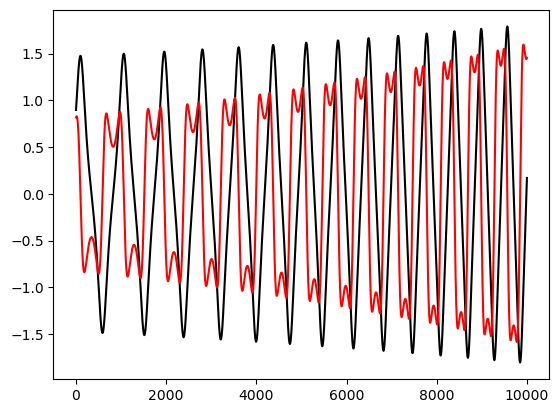

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa018424e80>

In [27]:
plot(tr[:, 1],c="black")
plot(tr[:, 2],c="red")

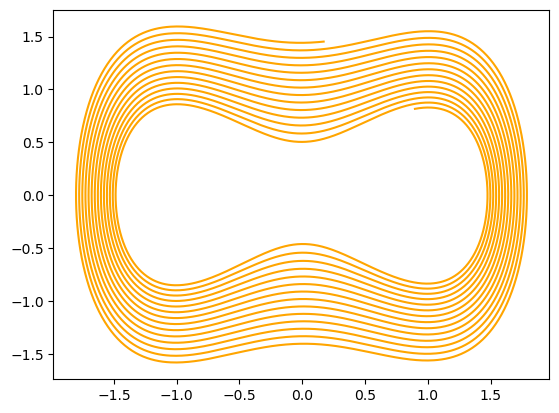

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa0184875b0>

In [28]:
plot(tr[:, 1], tr[:, 2], c = "orange")

In [29]:
function coupled_duffing!(du, u, p, t)
    du[1] = u[2] + p[1]*(p[2]*(u[1]+u[3])/2-u[1])
    du[2] = -p[3]*u[2]+u[1]-u[1]^3 + p[1]*(p[2]*(u[2]+u[4])/2-u[2])
    du[3] = u[4] + p[1]*(p[2]*(u[1]+u[3])/2-u[3])
    du[4] = -p[3]*u[4]+u[3]-u[3]^3 + p[1]*(p[2]*(u[2]+u[4])/2-u[4])
    return nothing
end

coupled_duffing! (generic function with 1 method)

In [30]:
using Random

In [47]:
cd = ContinuousDynamicalSystem(coupled_duffing!, [-rand(), rand(),rand(),rand()], [1.5, 0.5, -0.01])

4-dimensional continuous dynamical system
 state:       [-0.927872, 0.398082, 0.452235, 0.648517]
 rule f:      coupled_duffing!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [1.5, 0.5, -0.01]

In [48]:
using OrdinaryDiffEq
diffeq = (alg = Tsit5(), reltol = 1e-6, dtmax = 0.01)

(alg = Tsit5(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), reltol = 1.0e-6, dtmax = 0.01)

In [49]:
tr =  trajectory(cd, 200.0; diffeq)

4-dimensional StateSpaceSet{Float64} with 20001 points
 -0.927872  0.398082  0.452235  0.648517
 -0.911867  0.394675  0.450184  0.646378
 -0.896085  0.391062  0.448194  0.644242
 -0.880523  0.387261  0.446263  0.642107
 -0.86518   0.383291  0.444391  0.639975
 -0.850057  0.379168  0.442575  0.637843
 -0.835151  0.374908  0.440814  0.635712
 -0.820461  0.370527  0.439107  0.633582
 -0.805986  0.366039  0.437452  0.631451
 -0.791724  0.361457  0.435848  0.62932
 -0.777674  0.356793  0.434293  0.627189
 -0.763833  0.352061  0.432787  0.625057
 -0.7502    0.34727   0.431327  0.622925
  ⋮                             
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083  0.500312  0.667083  0.500312
  0.667083 

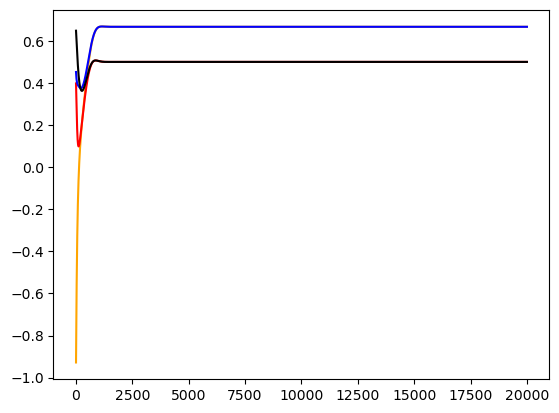

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa018052fb0>

In [50]:
plot(tr[:, 1], c = "orange")
plot(tr[:, 2], c = "red")
plot(tr[:, 3], c = "blue")
plot(tr[:, 4], c = "black")


In [56]:
#lyapunov(coupled_duffing!,5000;Ttr=5000)
lyapunov(cd,5000)

-0.0021773322469184715

In [57]:
lyapunovspectrum(cd,5000;Ttr=5000)

4-element Vector{Float64}:
 -2.253491017174241e-5
  2.538743120743108e-5
 -0.040933365866389244
 -0.040906547707492774

In [58]:
lyapunov_from_data()

```
lyapunov_from_data(R::Dataset, ks;  refstates, w, distance, ntype)
```

Return `E = [E(k) for k ∈ ks]`, where `E(k)` is the average logarithmic distance between states of a neighborhood that are evolved in time for `k` steps (`k` must be integer). The slope of `E` vs `k` approximate the maximum Lyapunov exponent, see below. Typically `R` is the result of delay coordinates of a single timeseries.

## Keyword Arguments

  * `refstates = 1:(length(R) - ks[end])` : Vector of indices that notes which states of the reconstruction should be used as "reference states", which means that the algorithm is applied for all state indices contained in `refstates`.
  * `w::Int = 1` : The [Theiler window](@ref).
  * `ntype = NeighborNumber(1)` : The neighborhood type. Either [`NeighborNumber`](@ref) or [`WithinRange`](@ref). See [Neighborhoods](@ref) for more info.
  * `distance::Metric = Cityblock()` : The distance function used in the logarithmic distance of nearby states. The allowed distances are `Cityblock()` and `Euclidean()`. See below for more info. The metric for finding neighbors is always the Euclidean one.

## Description

If the dataset exhibits exponential divergence of nearby states, then it should hold

$$
E(k) \approx \lambda\cdot k \cdot \Delta t + E(0)
$$

for a *well defined region* in the `k` axis, where $\lambda$ is the approximated maximum Lyapunov exponent. $\Delta t$ is the time between samples in the original timeseries. You can use [`linear_region`](@ref) with arguments `(ks .* Δt, E)` to identify the slope (= $\lambda$) immediatelly, assuming you have choosen sufficiently good `ks` such that the linear scaling region is bigger than the saturated region.

The algorithm used in this function is due to Parlitz[^Skokos2016], which itself expands upon Kantz [^Kantz1994]. In sort, for each reference state a neighborhood is evaluated. Then, for each point in this neighborhood, the logarithmic distance between reference state and neighborhood state(s) is calculated as the "time" index `k` increases. The average of the above over all neighborhood states over all reference states is the returned result.

If the `Metric` is `Euclidean()` then use the Euclidean distance of the full `D`-dimensional points (distance $d_E$ in ref.[^Skokos2016]). If however the `Metric` is `Cityblock()`, calculate the absolute distance of *only the first elements* of the `m+k` and `n+k` points of `R` (distance $d_F$ in ref.[^Skokos2016], useful when `R` comes from delay embedding).

[^Skokos2016]: Skokos, C. H. *et al.*, *Chaos Detection and Predictability* - Chapter 1 (section 1.3.2), Lecture Notes in Physics **915**, Springer (2016)

[^Kantz1994]: Kantz, H., Phys. Lett. A **185**, pp 77–87 (1994)


## Using general technique

In [44]:
t0=0
tf=1000
tspan=(t0,tf)
u0=[-rand(), rand(),rand(),rand()]
    

4-element Vector{Float64}:
 -0.057411483588365564
  0.832378102262361
  0.007133793374077935
  0.4416377684792623

In [45]:
prob=ODEProblem(coupled_duffing!,u0,tspan,(0.2, 0.5, 0.5))

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 1000)
u0: 4-element Vector{Float64}:
 -0.057411483588365564
  0.832378102262361
  0.007133793374077935
  0.4416377684792623

In [46]:
sol=solve(prob,Tsit5(),reltol=1e-6,abstol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 498-element Vector{Float64}:
    0.0
    0.028683881226284538
    0.0894300627561533
    0.16625829801803707
    0.26124020527136654
    0.3745271980996272
    0.5075462907020709
    0.660529084514401
    0.8313880015565971
    1.0179287967341912
    1.2255796499311213
    1.4673364236824111
    1.66939892920639
    ⋮
  974.4594256820436
  976.8088380368388
  979.2374953730993
  981.7670589379719
  984.3210343184049
  986.6254634702053
  988.7923416767662
  990.9712776529526
  993.1787089247662
  995.4359005916981
  997.7522569572245
 1000.0
u: 498-element Vector{Vector{Float64}}:
 [-0.057411483588365564, 0.832378102262361, 0.007133793374077935, 0.4416377684792623]
 [-0.033553332599450786, 0.8163380152525955, 0.019583126087927647, 0.4350316983553061]
 [0.015258418045903534, 0.785485489523122, 0.04529602692548044, 0.4225120924053183]
 [0.0740037723888976, 0.7521531394010813, 0.0767021198201181, 0.4093790821248

In [47]:
size(sol)

(4, 498)

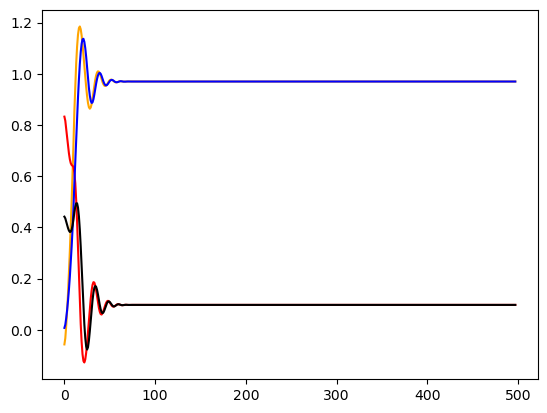

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa95f82b460>

In [48]:
plot(sol[1, :], c = "orange")
plot(sol[2, :], c = "red")
plot(sol[3, :], c = "blue")
plot(sol[4, :], c = "black")